In [1]:
!pip install scikit-plot

###**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

###**Import your dataset**

In [3]:
#reading the .xlsx dataset in to the dataframe
df = pd.read_excel("AIDA-Dataset.xlsx")

###**Data preprossesing**

In [4]:
short_names_mapping = {
    'Do you want to participate in this survey?': 'Participation',
    'Please state your age? (e.g. 25)': 'Age',
    'What is your gender?': 'Gender',
    'What degree are you currently pursuing?': 'Degree',
    'What is your current academic year? (e.g. 2)': 'AcademicYear',
    'Which medium of school have you come from?': 'SchoolMedium',
    'Which department do you study in?': 'Department',
    'What is your current cumulative grade points average (CGPA)?': 'CGPA',
    'Do you have any personal history of depression?': 'DepressionHistory',
    'What is your current relationship status?': 'RelationshipStatus',
    'What is your religion?': 'Religion',
    'What is your current place of residence?': 'Residence',
    'Currently I live - ': 'CurrentLocation',
    'Number of siblings (e.g. 2)': 'SiblingsCount',
    'What is your ordinal position/birth order among your siblings? (e.g. 1)': 'SiblingOrder',
    ' [I feel that I have additional responsibility to be in this position.]': 'ResponsibilityFeeling',
    'What is your father’s occupation? (If you do not see the occupation listed below or in case of a deceased father please choose the "other" option.)': 'FatherOccupation',
    'What is your mother’s occupation? (If you do not see the occupation listed below or in case of a deceased mother please choose the "other" option.)': 'MotherOccupation',
    'What is your family’s (household) average monthly income? (e.g. 2000)': 'FamilyIncome',
    'Do you have any financial hardship currently?': 'FinancialHardship',
    'Is your family financially dependent on you?': 'FinancialDependency',
    'Do you have anyone in your family who has been suffering from fatal diseases?': 'FamilyIllness',
    ' [How often do you communicate with your parents?]': 'ParentalCommunicationFrequency',
    'Give your opinion about these: [My parents are very strict about my daily life style]': 'ParentalStrictness',
    'Give your opinion about these: [My parents give pressure for my academic subject selection]': 'ParentalAcademicPressure',
    'Give your opinion about these: [My parents give pressure for my marriage.]': 'ParentalMarriagePressure',
    'Give your opinion about these: [My parents give pressure for my career choice.]': 'ParentalCareerPressure',
    'Give your opinion about these: [My parents give pressure regarding my decision on studying abroad]': 'ParentalStudyAbroadPressure',
    'Give your opinion about these statements [I have bad understanding with my parents]': 'ParentalUnderstanding',
    'Give your opinion about these statements [I have bad bonding with my siblings]': 'SiblingBonding',
    'Give your opinion about these statements [My  parents have unstable relationship]': 'ParentalRelationshipStability',
    'Give your opinion about these statements [I don’t get along with most of my classmates/friends]': 'PeerRelationship',
    'Give your opinion about these statements [My university teachers are unsupportive]': 'TeacherSupport',
    'Give your opinion about these statements [An unstable relationship with my partner affects my life.]': 'PartnerRelationshipImpact',
    'Give your opinion about these statements [A discouraging working environment (colleague/boss) affects the output of my work.]': 'WorkEnvironmentImpact',
    ' [I feel society interferes with my freedom of expression (freedom of speech / movement / etc...)]': 'SocietalInterference',
    'Have you ever experienced this sort of violence before? [I have faced Physical Violence before. (someone uses his/her body part or an object to control my actions) (শারিরিকনির্যাতন)]': 'PhysicalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Sexual Violence before. (i am/was forced to unwillingly take part in sexual activity) (যৌনসহিংসতা)]': 'SexualViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Verbal Violence before. (someone uses language, whether spoken or written as an abusing tool against me) (মৌখিকগালি)]': 'VerbalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Emotional Violence before. (someone says or does something to make me feel stupid or worthless) (মানসিকহিংসা)]': 'EmotionalViolenceExperience',
    'What kind of institution do you study in?': 'InstitutionType',
    'Self-perception on Academic status: [My academic performance is very poor.]': 'PoorAcademicPerformanceSelfPerception',
    'Self-perception on Academic status: [I have been criticized for my academic result.]': 'AcademicCriticismSelfPerception',
    'Self-perception on Academic status: [I am unsatisfied with my academic workload (i.e., presentations, assignments, tutorials)]': 'UnsatisfiedAcademicWorkloadSelfPerception',
    'Give your opinion for these: [I am not studying in my subject of interest.]': 'NonInterestSubjectOpinion',
    'Give your opinion for these: [I am unhappy with the subject that I am studying.]': 'UnhappySubjectOpinion',
    'Give your opinion for these: [I am not studying in the institution of my interest.]': 'NonInterestInstitutionOpinion',
    'Give your opinion for these: [I am unhappy with the institution that I am studying.]': 'UnhappyInstitutionOpinion',
    'Did you select the subject due to career prospects only?': 'CareerProspectsSubjectSelection',
    'What is your current employment status?': 'EmploymentStatus',
    'Which of the following is true for you?': 'PersonalSituation',
    'How the pandemic is affecting your full time /part time job/tutoring?': 'PandemicImpactOnWork',
    'I am satisfied with my current job.': 'JobSatisfaction',
    'My family/partner is satisfied with my current job.': 'FamilyPartnerJobSatisfaction',
    ' [In my opinion, enough jobs are not available related to my pursued subject. (your academic subject )]': 'InsufficientJobsSubjectOpinion',
    'How many close friends (approximately) do you have? (e.g. 3)': 'CloseFriendsCount',
    ' [How often do you hang out with your friends?]': 'FriendHangoutFrequency',
    'Are you involved in any extracurricular activities?': 'ExtracurricularInvolvement',
    'How strongly do you agree with each of the following questions: [How often do you smoke?]': 'SmokingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you take drugs?]': 'DrugUseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you drink alcohol?]': 'AlcoholConsumptionFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you engage in physical exercise?]': 'PhysicalExerciseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you practice religious activities?]': 'ReligiousActivitiesFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play video games?]': 'VideoGamePlayingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play sports?]': 'SportsPlayingFrequencyPerception',
    'On average how many hours do you spend in social media? (e.g. 5)': 'SocialMediaUsageHours',
    'Give your opinion on these: [The success stories of my peers in social media sometimes pose negative impact on me]': 'PeerSuccessImpactOnSocialMediaOpinion',
    'Give your opinion on these: [Social media has negative influence on my purchase decision]': 'SocialMediaInfluenceOnPurchaseDecisionOpinion',
    "Give your opinion on these: [I find human bonding less trust-worthy because it's easy to become imposters on social media]": 'TrustInHumanBondingOnSocialMediaOpinion',
    'Give your opinion on these: [I feel numbness of feelings as I am constantly seeing variety of incidents on social media.]': 'NumbnessFeelingsDueToSocialMediaOpinion',
    'Give your opinion on these: [I like to interact with my friends in person rather than in virtual mode.]': 'PreferenceForInPersonInteractionOpinion',
    'Sad': 'Sadness',
    'Depressed mood (sadness, hopeless, helpless, worthless)': 'DepressedMood',
    'Future': 'FutureOutlook',
    'Failure': 'FearOfFailure',
    'Satisfaction': 'SatisfactionLevel',
    'Guilty ': 'FeelingsOfGuilt',
    'Feelings of guiltiness ': 'GuiltFeelings',
    'Punished': 'FeelingsOfPunishment',
    'Disappointment ': 'FeelingsOfDisappointment',
    'Blame on me': 'SelfBlame',
    'Cry ': 'TendencyToCry',
    'Irritated': 'Irritability',
    'Interest in other people': 'InterestInOthers',
    'Decisions': 'DecisionMaking',
    'Look': 'AppearanceConcern',
    'Self-Care (This question is pertaining to what you feeling right now)': 'SelfCarePerception',
    'Energy Level:': 'EnergyLevel',
    'Work and Activities': 'WorkAndActivitiesLevel',
    'Sleep ': 'SleepQuality',
    'Sleeping Too Much:': 'ExcessiveSleeping',
    'Tired': 'Fatigue',
    'Appetite': 'AppetiteLevel',
    'a)\tAccording to you:': 'SubjectiveHealthPerception',
    'b)\tAccording to weekly measurements:': 'ObjectiveHealthPerception',
    'Feelings of suicide': 'SuicidalFeelings',
    'Retardation (প্রতিবন্ধকতা) (slowness of thought and speech, impaired ability to concentrate, decreased motor activity)/ (চিন্তা , কথা , মনোযোগ , মস্তিষ্কের কর্মক্ষমতা হ্রাস)': 'CognitiveRetardation',
    'Agitation (feeling of irritability or severe restlessness) (উত্কণ্ঠা)': 'Agitation',
    'Anxiety Psychic (মানসিক দুশ্চিন্তা)': 'PsychicAnxiety',
    ' [I felt that I was rather touchy/oversensitive over the past week]': 'SensitivityPerception',
    ' [I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)]': 'HeartAwarenessPerception',
    'ANXIETY SOMATIC (দৈহিক) (physiological concomitants of anxiety) such as\ngastro-intestinal – dry mouth, wind, indigestion (বদ হজম), diarrhea, cramps ( পেটে ব্যাথা), belching( বমি)\ncardio-vascular – palpitations ( বুক ধড়ফড়) , headaches\nrespiratory – hyperventilation ( জোরে জোরে শ্বাস নেয়া), sighing urinary frequency sweating': 'SomaticAnxietySymptoms',
    'Somatic Symptoms Gastro-Intestinal': 'GastrointestinalSymptoms',
    'General Somatic Symptoms': 'GeneralSomaticSymptoms',
    'Genital Symptoms (symptoms such as loss of libido, menstrual disturbances)': 'GenitalSymptoms',
    'Hypochondriasis (The belief and fear of serious illness) / ( মরণব্যাধি আছে এমন ভ্রান্ত ধারনা )': 'Hypochondriasis',
    'Insight (self-perception)': 'SelfPerception',
}
df.rename(columns=short_names_mapping, inplace=True)


###**Feature Engineering**

In [5]:
# demographic_feature=['Age',
#  'Gender',
#  'Degree',
#  'SchoolMedium',
#  'CGPA']

In [6]:
# df_demography = df[demographic_feature]
# df_demography.head()

In [7]:
df_scale = df
df_scale["Sadness"] = df["Sadness"].replace({"I do not feel sad.": 0,
                                   "I feel sad": 1,
                                   "I am sad all the time and I can't snap out of it.": 2,
                                   "I am so sad and unhappy that I can't stand it.": 3})


df_scale['FutureOutlook'] =  df['FutureOutlook'].replace( { 'I am not particularly discouraged about the future.': 0,
                                        'I feel discouraged about the future.' : 1,
                                        'I feel I have nothing to look forward to.' : 2,
                                        'I feel the future is hopeless and that things cannot improve.':3})


df_scale['FearOfFailure']=  df['FearOfFailure'].replace({ 'I do not feel like a failure.':0,
                                        'I feel I have failed more than the average person.':1,
                                        'As I look back on my life, all I can see is a lot of failures.' :2,
                                        'I feel I am a complete failure as a person.':3})


df_scale['SatisfactionLevel']=  df['SatisfactionLevel'].replace({"I get as much satisfaction out of things as I used to.": 0,
                                                 "I don't enjoy things the way I used to.": 1,
                                                "I don't get real satisfaction out of anything anymore." : 2,
                                                "I am dissatisfied or bored with everything.": 3 })

df_scale['FeelingsOfGuilt']=  df['FeelingsOfGuilt'].replace({"I don't feel particularly guilty": 0,
                                         "I feel guilty a good part of the time.": 1,
                                         "I feel quite guilty most of the time." : 2,
                                         "I feel guilty all of the time." : 3 })


df_scale['FeelingsOfPunishment']=  df['FeelingsOfPunishment'].replace({"I don't feel I am being punished.": 0,
                                             "I feel I may be punished.": 1,
                                             "I expect to be punished." : 2,
                                             "I feel I am being punished.": 3 })

df_scale['FeelingsOfDisappointment']=  df['FeelingsOfDisappointment'].replace({ "I don't feel disappointed in myself.": 0,
                                              "I am disappointed in myself.": 1,
                                              "I am disgusted with myself.": 2,
                                              "I hate myself.": 3 })

df_scale['SelfBlame']=  df['SelfBlame'].replace({ "I don't feel I am any worse than anybody else.": 0,
                                              "I am critical of myself for my weaknesses or mistakes.": 1,
                                              "I blame myself all the time for my faults.": 2,
                                              "I blame myself for everything bad that happens.": 3 })

df_scale['TendencyToCry']=  df['TendencyToCry'].replace({ "I don't cry any more than usual.": 0,
                                              "I cry more now than I used to.": 1,
                                              "I cry all the time now.": 2,
                                              "I used to be able to cry, but now I can't cry even though I want to.": 3 })

df_scale['Irritability']=  df['Irritability'].replace({ "I am no more irritated by things than I ever was.": 0,
                                    "I am slightly more irritated now than usual.": 1,
                                    "I am quite annoyed or irritated a good deal of the time.": 2,
                                    "I feel irritated all the time.": 3 })

df_scale['InterestInOthers']=  df['InterestInOthers'].replace({ "I have not lost interest in other people.": 0,
                                    "I am less interested in other people than I used to be.": 1,
                                    "I have lost most of my interest in other people.": 2,
                                    "I have lost all of my interest in other people.": 3 })

df_scale['DecisionMaking']=  df['DecisionMaking'].replace({ "I make decisions about as well as I ever could.": 0,
                                    "I put off making decisions more than I used to.": 1,
                                    "I have greater difficulty in making decisions more than I used to.": 2,
                                    "I can't make decisions at all anymore.": 3 })

df_scale['AppearanceConcern']=  df['AppearanceConcern'].replace({ "I don't feel that I look any worse than I used to.": 0,
                                    "I am worried that I am looking old or unattractive.": 1,
                                    "I feel there are permanent changes in my appearance that make me look unattractive": 2,
                                    "I believe that I look ugly.": 3 })

df_scale['SleepQuality']=  df['SleepQuality'].replace({ "I can sleep as well as usual.": 0,
                                    "I don't sleep as well as I used to.": 1,
                                    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.": 2,
                                    "I wake up several hours earlier than I used to and cannot get back to sleep.": 3 })

df_scale['Fatigue']=  df['Fatigue'].replace({ "I don't get more tired than usual.": 0,
                                    "I get tired more easily than I used to.": 1,
                                    "I get tired from doing almost anything.": 2,
                                    "I am too tired to do anything.": 3 })


df_scale['AppetiteLevel']=  df['AppetiteLevel'].replace({ "My appetite is no worse than usual.": 0,
                                    "My appetite is not as good as it used to be.": 1,
                                    "My appetite is much worse now.": 2,
                                    "I have no appetite at all anymore.": 3 })



df_scale['SuicidalFeelings']=  df['SuicidalFeelings'].replace({ "Absent.": 0,
                                    "Feels life is not worth living.(জীবন নিরর্থক মনে হওয়া)": 1,
                                    "Wishes he/she were dead or any thoughts of possible death to self.(মৃত্যুর ইচ্ছা/চিন্তা)": 2,
                                    "Ideas or gestures of suicide.(আত্মহত্যার ধারনা পোষণ করা)" : 3,
                                    "Attempts at suicide.(আত্মহত্যার চেষ্টা)" :3})


df_scale['EnergyLevel']=  df['EnergyLevel'].replace({ "There is no change in my usual level of energy.": 0,
                                    "I get tired more easily than usual.": 1,
                                    "I have to make a big effort to start or finish my usual daily activities (for example, shopping, homework, cooking, or going to work)." : 2,
                                    "I really cannot carry out most of my usual daily activities because I just don't have the energy." :3})

df_scale['ObjectiveHealthPerception']=  df['ObjectiveHealthPerception'].replace({ "Not assessed.": 0,
                                                                    "Less than half kg weight loss in week.": 1,
                                                                    "Greater than half kg weight loss in week.": 2,
                                                                    "Greater than 1 kg weight loss weight in week." : 3})

df_scale['SomaticAnxietySymptoms']=  df['SomaticAnxietySymptoms'].replace({ "Absent.": 0, "Mild.": 1, "Moderate.": 2, "Severe." : 3,
                                                           "Incapacitating/ (অক্ষম)" :3,
                                                          'Incapacitating/ (?????)':3}) #Incapacitating.





# our
# Feels life is not worth living. [1]
# 2 |__| Wishes he/she were dead or any thoughts of possible death to self. [2]
# 3 |__| Ideas or gestures of suicide.[3]
# 4 |__| "Attempts at suicide."[3]


# BDI
# 1 I have thoughts of killing myself, but I would not carry them out.
# 2 I would like to kill myself.
# 3 I would kill myself if I had the chance




df_scale.head(5)

,Participation,Age,Gender,Degree,AcademicYear,SchoolMedium,Department,CGPA,DepressionHistory,RelationshipStatus,...,Agitation,PsychicAnxiety,SensitivityPerception,HeartAwarenessPerception,SomaticAnxietySymptoms,GastrointestinalSymptoms,GeneralSomaticSymptoms,GenitalSymptoms,Hypochondriasis,SelfPerception
0,Yes,23,Female,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.38,No,Single,...,Fidgetiness/ (অস্থিরতা),Subjective(depending on patient/subject) tensi...,some of the time,not at all,0,None.,None.,Absent.,Not present.,Denies being ill at all.
1,Yes,24,Female,Postgraduate,1,English Medium,Business & Economics Studies,3.08,Yes,Single,...,None.,Worrying about minor matters. (ছোটখাট বিষয় নিয়...,not at all,not at all,1,None.,None.,Absent.,Not present.,Denies being ill at all.
2,Yes,24,Male,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.05,Yes,Prefer not to say,...,Fidgetiness/ (অস্থিরতা),Subjective(depending on patient/subject) tensi...,some of the time,a good part of time,0,None.,"Heaviness in limbs, back or head. Backaches, h...",Absent.,Not present.,Acknowledges being depressed and ill.
3,Yes,22,Male,Postgraduate,1,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.82,Yes,Single,...,None.,Worrying about minor matters. (ছোটখাট বিষয় নিয়...,a good part of time,some of the time,1,None.,None.,Absent.,Not present.,Denies being ill at all.
4,Yes,25,Male,Undergraduate,4,Bangla Medium,Business & Economics Studies,3.40,Yes,Single,...,"Moving about, can’t sit still.",Subjective(depending on patient/subject) tensi...,some of the time,some of the time,1,Loss of appetite but eating without staff enco...,"Heaviness in limbs, back or head. Backaches, h...",Severe.,Preoccupation (আচ্ছন্ন) with health,Acknowledges being depressed and ill.


In [8]:
df_scale = df_scale.loc[:, ['Sadness', 'FutureOutlook', 'FearOfFailure', 'SatisfactionLevel',
                            'FeelingsOfGuilt', 'FeelingsOfPunishment', 'FeelingsOfDisappointment',
                            'SelfBlame', 'TendencyToCry', 'Irritability', 'InterestInOthers',
                            'DecisionMaking', 'AppearanceConcern', 'SleepQuality', 'Fatigue',
                            'AppetiteLevel', 'SuicidalFeelings', 'EnergyLevel', 'ObjectiveHealthPerception',
                            'SomaticAnxietySymptoms']]

In [9]:
df_scale.columns.tolist()

['Sadness',
 'FutureOutlook',
 'FearOfFailure',
 'SatisfactionLevel',
 'FeelingsOfGuilt',
 'FeelingsOfPunishment',
 'FeelingsOfDisappointment',
 'SelfBlame',
 'TendencyToCry',
 'Irritability',
 'InterestInOthers',
 'DecisionMaking',
 'AppearanceConcern',
 'SleepQuality',
 'Fatigue',
 'AppetiteLevel',
 'SuicidalFeelings',
 'EnergyLevel',
 'ObjectiveHealthPerception',
 'SomaticAnxietySymptoms']

In [10]:
df_scale.head()

,Sadness,FutureOutlook,FearOfFailure,SatisfactionLevel,FeelingsOfGuilt,FeelingsOfPunishment,FeelingsOfDisappointment,SelfBlame,TendencyToCry,Irritability,InterestInOthers,DecisionMaking,AppearanceConcern,SleepQuality,Fatigue,AppetiteLevel,SuicidalFeelings,EnergyLevel,ObjectiveHealthPerception,SomaticAnxietySymptoms
0,1,0,1,0,1,3,0,1,0,0,0,0,0,1,0,0,0,0,1,0
1,0,0,1,1,0,0,1,0,0,1,3,0,0,1,0,1,0,0,1,1
2,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,2,0
3,1,1,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,1,0,1
4,1,0,0,1,0,0,1,0,3,1,1,1,2,1,0,2,1,0,3,1


In [11]:
#printing total score
df_scale['TotalScore'] = df_scale[[col for col in df_scale.columns]].sum(axis=1)
df_scale.head()

,Sadness,FutureOutlook,FearOfFailure,SatisfactionLevel,FeelingsOfGuilt,FeelingsOfPunishment,FeelingsOfDisappointment,SelfBlame,TendencyToCry,Irritability,...,DecisionMaking,AppearanceConcern,SleepQuality,Fatigue,AppetiteLevel,SuicidalFeelings,EnergyLevel,ObjectiveHealthPerception,SomaticAnxietySymptoms,TotalScore
0,1,0,1,0,1,3,0,1,0,0,...,0,0,1,0,0,0,0,1,0,9
1,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1,11
2,1,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,2,0,7
3,1,1,1,0,1,0,1,1,0,1,...,0,1,0,1,0,1,1,0,1,13
4,1,0,0,1,0,0,1,0,3,1,...,1,2,1,0,2,1,0,3,1,19


In [12]:
# Assign an empty list to store the ratings
depression_Level = []

for row in df_scale['TotalScore']:

    if row <= 10:
        depression_Level.append('Normal')

    elif row <= 16:
        depression_Level.append('Mild')

    elif row <= 20:
        depression_Level.append('Borderline')

    elif row <= 30:
        depression_Level.append('Moderate')

    elif row <= 40:
        depression_Level.append('Severe')

    else:
        depression_Level.append('Extreme')

# Assign the ratings list to a new column called 'DepressionLevel' in the 'df_scale' dataframe
df_scale['DepressionLevel'] = depression_Level

df_scale.drop(columns = 'TotalScore', inplace = True)
print(df_scale.shape)
df_scale.head()

(520, 21)


,Sadness,FutureOutlook,FearOfFailure,SatisfactionLevel,FeelingsOfGuilt,FeelingsOfPunishment,FeelingsOfDisappointment,SelfBlame,TendencyToCry,Irritability,...,DecisionMaking,AppearanceConcern,SleepQuality,Fatigue,AppetiteLevel,SuicidalFeelings,EnergyLevel,ObjectiveHealthPerception,SomaticAnxietySymptoms,DepressionLevel
0,1,0,1,0,1,3,0,1,0,0,...,0,0,1,0,0,0,0,1,0,Normal
1,0,0,1,1,0,0,1,0,0,1,...,0,0,1,0,1,0,0,1,1,Mild
2,1,0,0,0,1,1,0,0,1,1,...,0,0,0,0,0,0,0,2,0,Normal
3,1,1,1,0,1,0,1,1,0,1,...,0,1,0,1,0,1,1,0,1,Mild
4,1,0,0,1,0,0,1,0,3,1,...,1,2,1,0,2,1,0,3,1,Borderline


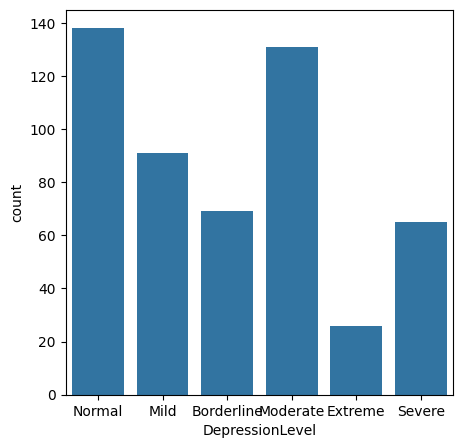

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
sns.countplot(x = df_scale['DepressionLevel'] )
plt.show()

In [14]:
# # One-hot encoding for nominal catagorical valuse in demograpy dataframe
# df_demo_encoded = pd.get_dummies(df_demography)
# df_demo_encoded.head()

In [15]:
# #merging both demographic features and scale features
# df_merged = pd.merge(df_demo_encoded, df_scale, left_index=True, right_index=True)
# df_merged.head()

In [16]:
# df_merged.shape

In [17]:
# Assign features (X) and target variable (y) || y = f(x)
X = df_scale.drop('DepressionLevel', axis=1)  # Features (all columns except 'Target column')
y = df_scale['DepressionLevel']  # Target variable ('Target' column)

###**Train Test Split** (No Need to change anthing from here)

In [18]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

###**Feature Scalling**

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Define 8 different classifiers**

In [20]:
# Defining classifiers in the dictoranry
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors = 8),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

### **Train and evaluate classifiers**

-------------KNN:-------------
Accuracy: 0.69
Precision: 0.70
Recall: 0.67
F1 Score: 0.67

-------------Decision Tree:-------------
Accuracy: 0.61
Precision: 0.63
Recall: 0.61
F1 Score: 0.62

-------------Random Forest:-------------
Accuracy: 0.70
Precision: 0.72
Recall: 0.65
F1 Score: 0.67

-------------Logistic Regression:-------------
Accuracy: 0.83
Precision: 0.84
Recall: 0.80
F1 Score: 0.81

-------------Naive Bayes:-------------
Accuracy: 0.79
Precision: 0.81
Recall: 0.76
F1 Score: 0.78

-------------SVM:-------------
Accuracy: 0.87
Precision: 0.87
Recall: 0.83
F1 Score: 0.85

-------------AdaBoost:-------------
Accuracy: 0.46
Precision: 0.30
Recall: 0.38
F1 Score: 0.32

-------------Gradient Boosting:-------------
Accuracy: 0.67
Precision: 0.66
Recall: 0.63
F1 Score: 0.64



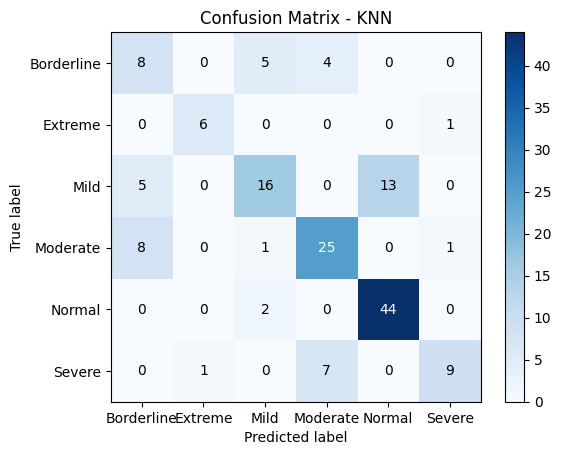

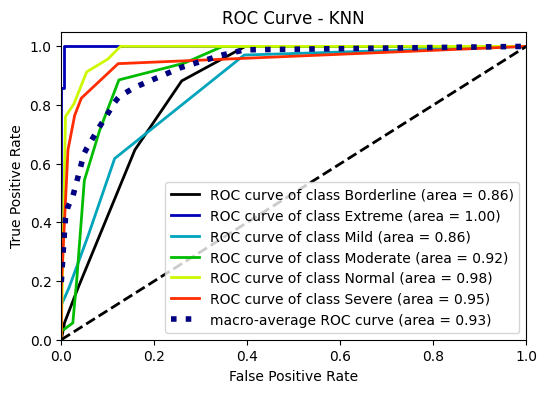

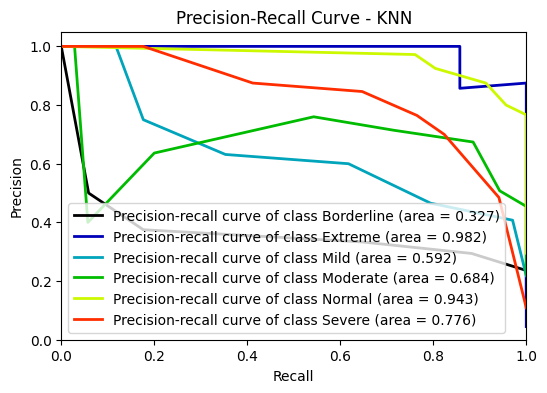

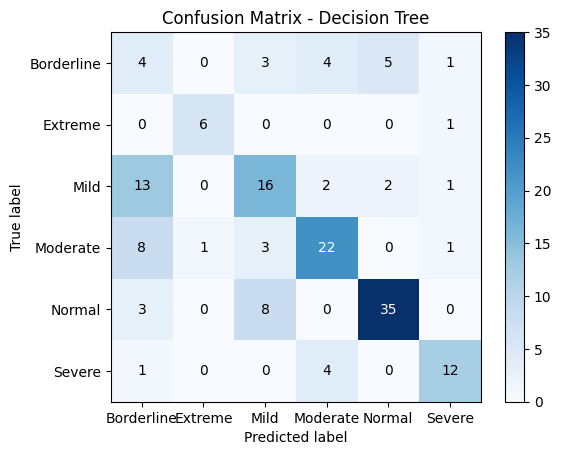

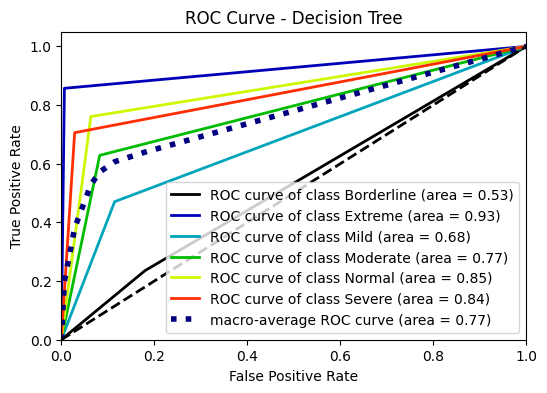

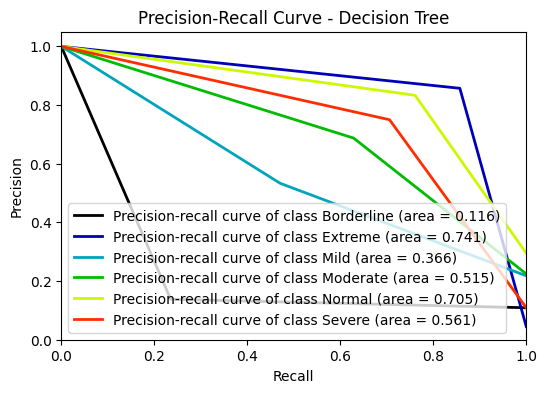

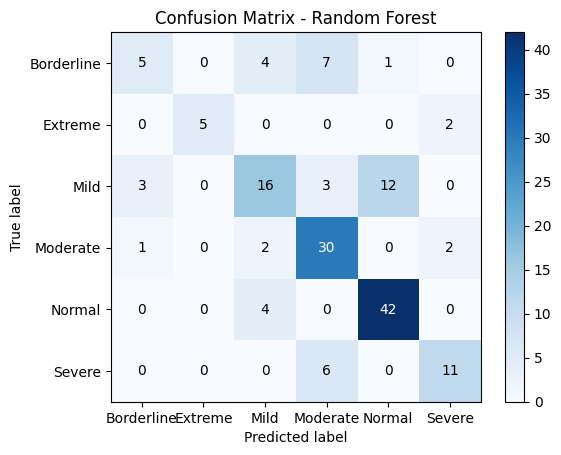

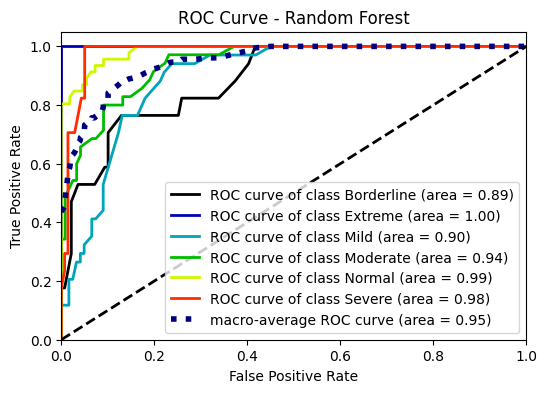

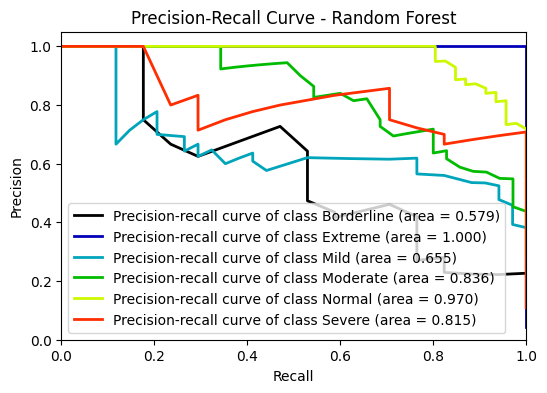

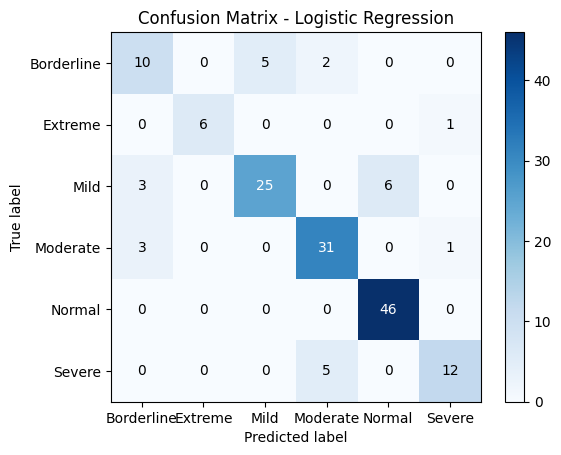

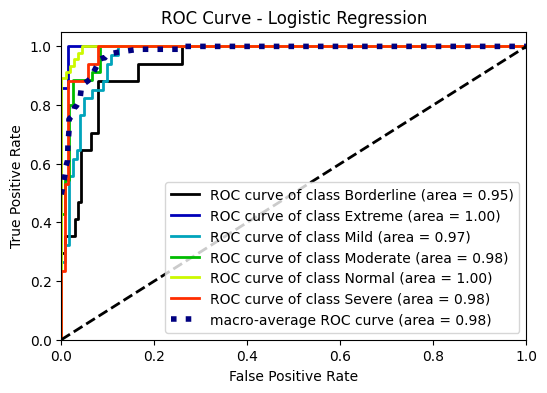

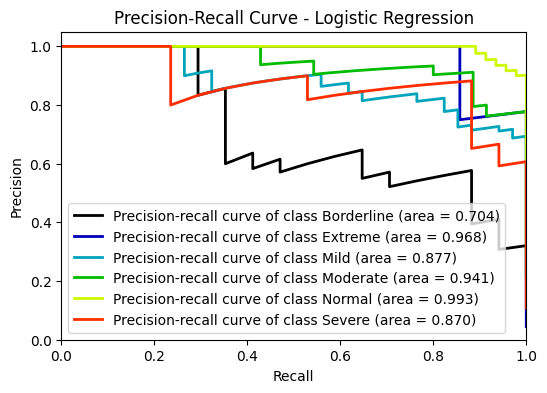

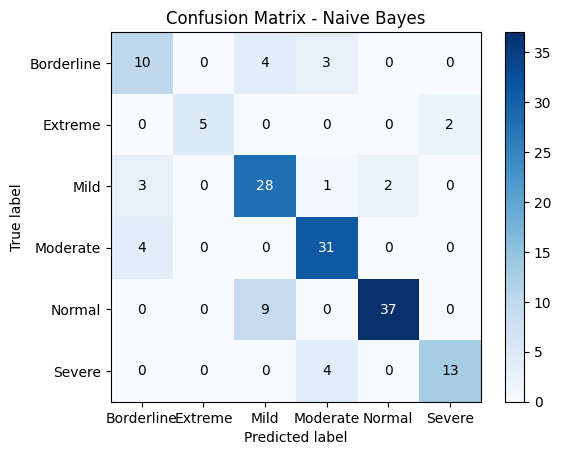

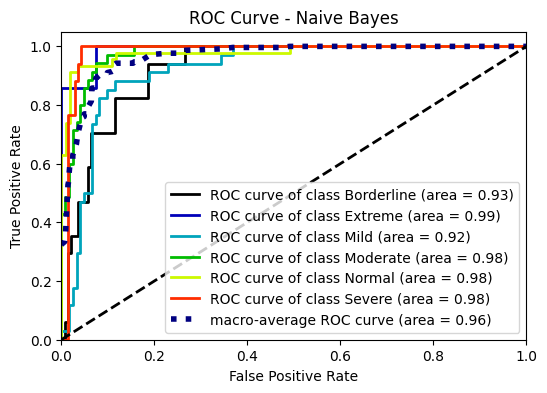

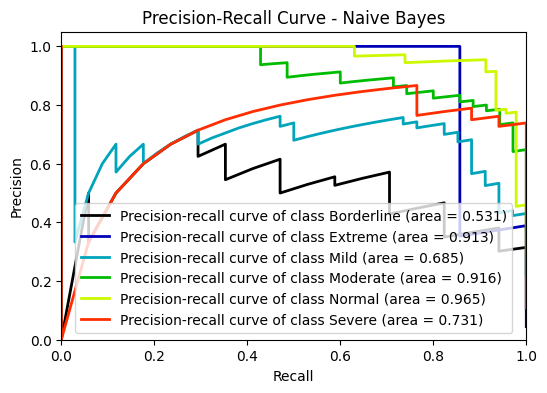

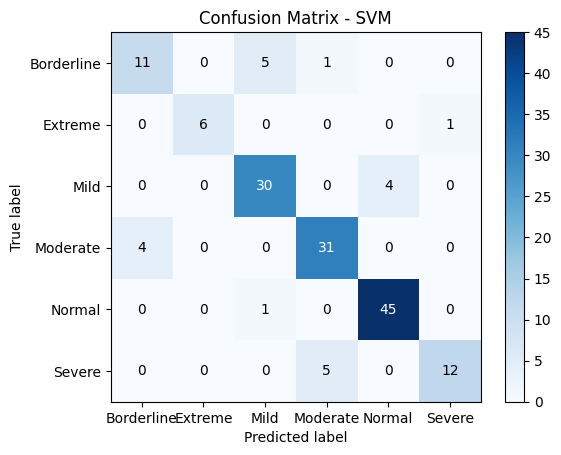

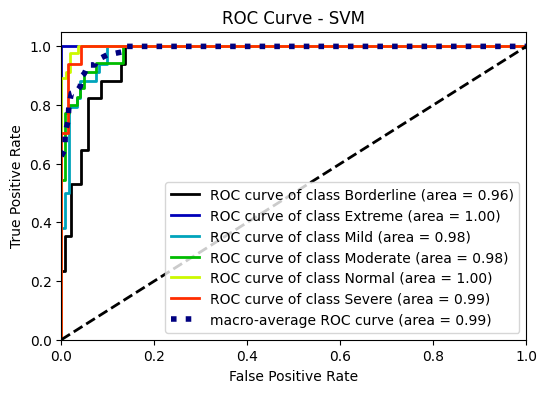

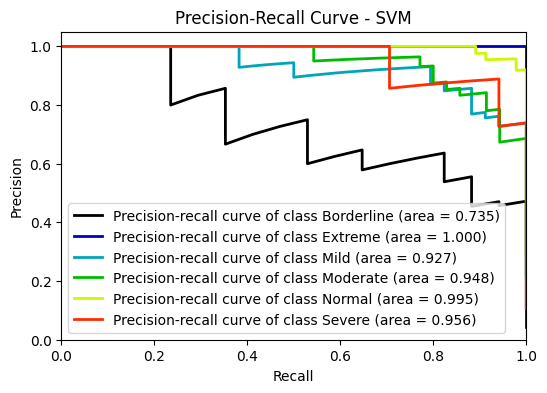

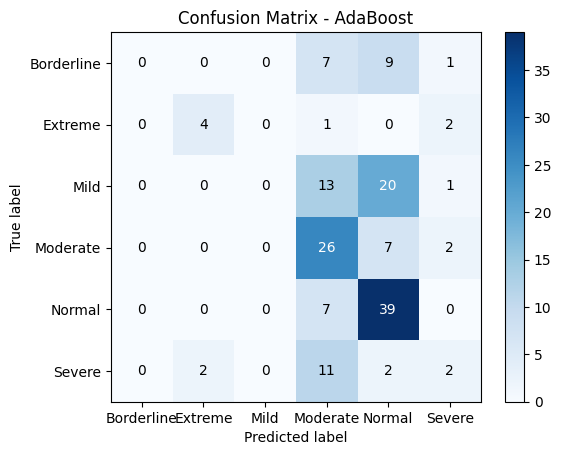

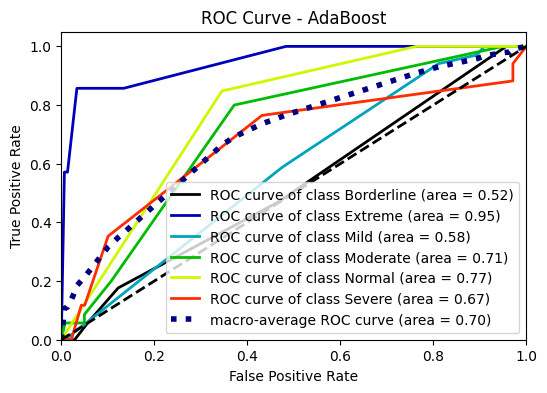

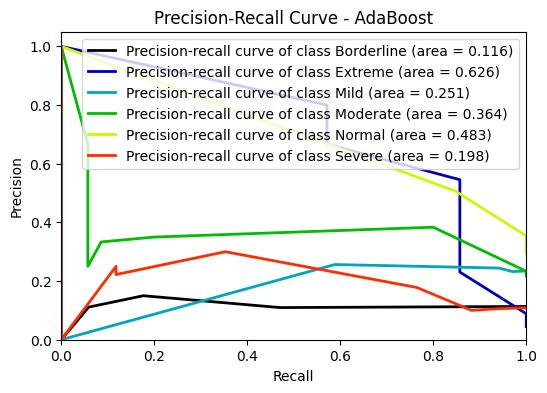

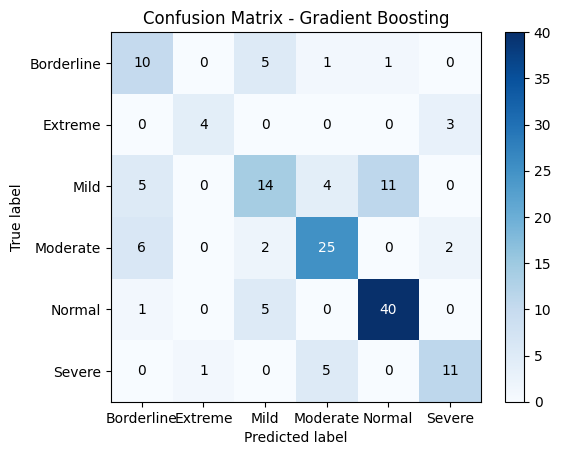

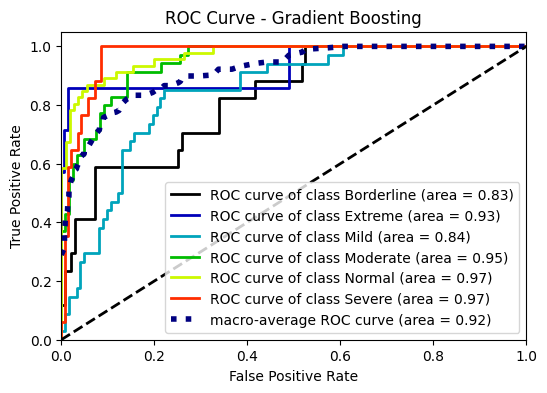

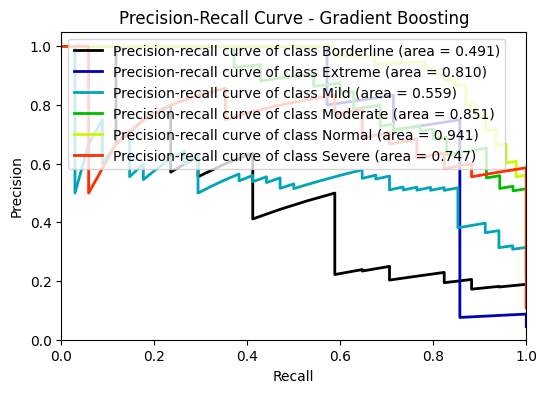

In [21]:
# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train, y_train)

    # Predict using the trained classifier
    y_pred = clf.predict(X_test)

    # Evaluate the classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print evaluation metrics
    print(f"-------------{name}:-------------")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix - {name}");

    # Plot ROC curve with classifier name
    y_probas = clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(6,4), plot_micro=False, plot_macro=True, title=f"ROC Curve - {name}");

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(6,4), plot_micro=False, title=f"Precision-Recall Curve - {name}");

    print()


### **Hyperparameter search spaces for each classifier**

In [22]:
# from sklearn.model_selection import GridSearchCV
# # Defining hyperparameter search spaces for each classifier
# param_grids = {
#     'KNN': {'n_neighbors': np.arange(1, 11)},
#     'Decision Tree': {'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
#     'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': np.arange(1, 11), 'criterion': ['gini', 'entropy']},
#     'Logistic Regression': {'C': np.logspace(-4, 4, 9), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
#     'Naive Bayes': {},
#     'SVM': {'C': np.logspace(-3, 3, 7), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto']},
#     'AdaBoost': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1]},
#     'Gradient Boosting': {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1], 'max_depth': np.arange(1, 11)}
# }

In [23]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Defining hyperparameter search spaces for each classifier
param_grids = {
    'KNN': {
        'n_neighbors': np.arange(1, 11),
        'metric': ['euclidean', 'manhattan', 'minkowski']  # Added distance metric options
    },
    'Decision Tree': {
        'max_depth': np.arange(1, 21),  # Extended depth range
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5, 10],  # Added for controlling data split
        'min_samples_leaf': [1, 2, 4]   # Added for controlling leaf node size
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': np.arange(1, 21),
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2']  # Added for feature selection
    },
    'Logistic Regression': {
        'C': np.logspace(-2, 2, 5),  # Adjusted C range for better exploration
        'solver': ['newton-cg', 'lbfgs']  # Removed less common solvers (consider revisiting based on data)
    },
    'Naive Bayes': {
        # No additional parameters commonly tuned for Naive Bayes
    },
    'SVM': {
        'C': np.logspace(-1, 1, 3),  # Adjusted C range for SVM
        'kernel': ['linear', 'poly'],  # Consider adding non-linear kernels if needed later
        'gamma': np.logspace(-2, 2, 3),  # Specific gamma search space
        'degree': [2, 3]  # Added for polynomial kernel (if used)
    },
    'AdaBoost': {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'algorithm': ['SAMME.R', 'SAMME']  # Added algorithm options
    },
    'Gradient Boosting': {
        'n_estimators': [10, 50, 100, 200],
        'learning_rate': [0.001, 0.01, 0.1, 1],
        'max_depth': np.arange(1, 11),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'loss': ['deviance', 'exponential']  # Added loss function options
    }
}


### **Implementing hyperparameter optimization for each classifier using GridSearchCV**

In [ ]:
# Performing hyperparameter tuning for each classifier using GridSearchCV
best_classifiers = {}

for classifier_name, classifier in classifiers.items():
    # Initialize GridSearchCV for the current classifier
    grid_search = GridSearchCV(classifier, param_grids[classifier_name], scoring='accuracy', cv=5, n_jobs=-1)

    # Fit the GridSearchCV to perform hyperparameter tuning
    grid_search.fit(X_train, y_train)

    # Store the best estimator for the current classifier
    best_classifiers[classifier_name] = grid_search.best_estimator_

    # Print the best parameters and corresponding score for the current classifier
    print(f"{classifier_name}: Best parameters - {grid_search.best_params_}, Best score - {grid_search.best_score_}")


KNN: Best parameters - {'metric': 'euclidean', 'n_neighbors': 7}, Best score - 0.7088660578386606
Decision Tree: Best parameters - {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}, Best score - 0.5960426179604262
Random Forest: Best parameters - {'criterion': 'gini', 'max_depth': 18, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}, Best score - 0.7610730593607304
Logistic Regression: Best parameters - {'C': 100.0, 'solver': 'newton-cg'}, Best score - 0.9037671232876712
Naive Bayes: Best parameters - {}, Best score - 0.7443302891933028
SVM: Best parameters - {'C': 1.0, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'}, Best score - 0.8955098934550989
AdaBoost: Best parameters - {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 200}, Best score - 0.5138127853881278
Gradient Boosting: Best parameters - {'learning_rate': 1, 'loss': 'deviance', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split':

### **Evaluating the final results**

-------------KNN:-------------
Accuracy: 0.71
Precision: 0.73
Recall: 0.68
F1 Score: 0.70

-------------Decision Tree:-------------
Accuracy: 0.56
Precision: 0.58
Recall: 0.55
F1 Score: 0.57

-------------Random Forest:-------------
Accuracy: 0.72
Precision: 0.74
Recall: 0.66
F1 Score: 0.69

-------------Logistic Regression:-------------
Accuracy: 0.93
Precision: 0.94
Recall: 0.90
F1 Score: 0.92

-------------Naive Bayes:-------------
Accuracy: 0.79
Precision: 0.81
Recall: 0.76
F1 Score: 0.78

-------------SVM:-------------
Accuracy: 0.91
Precision: 0.89
Recall: 0.88
F1 Score: 0.89

-------------AdaBoost:-------------
Accuracy: 0.52
Precision: 0.37
Recall: 0.40
F1 Score: 0.37

-------------Gradient Boosting:-------------
Accuracy: 0.65
Precision: 0.63
Recall: 0.60
F1 Score: 0.61



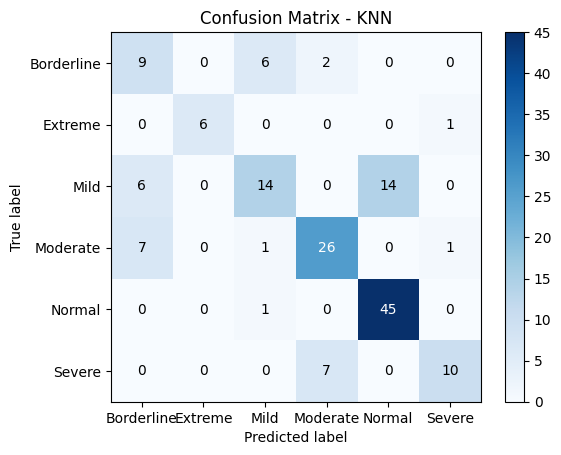

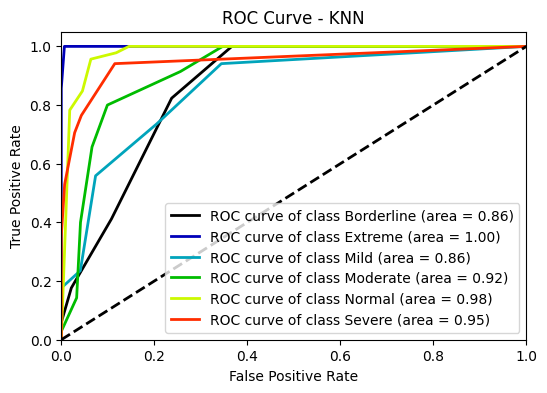

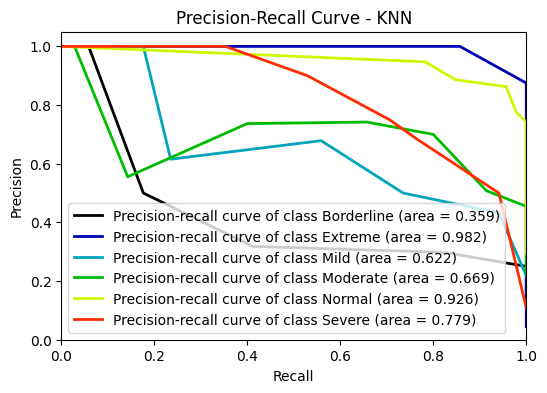

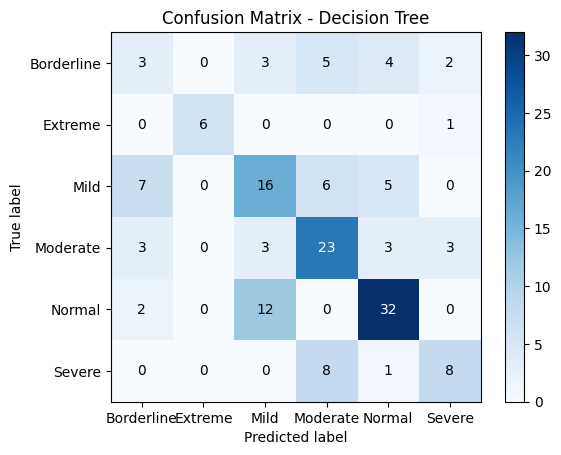

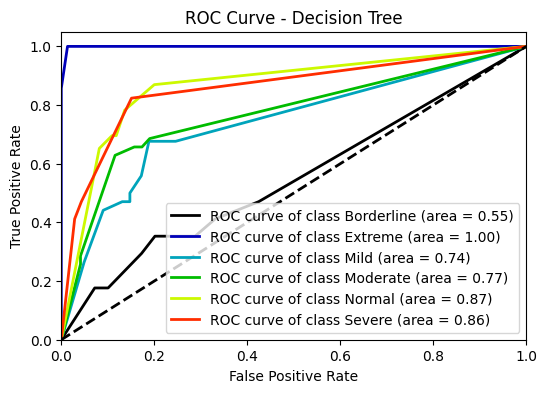

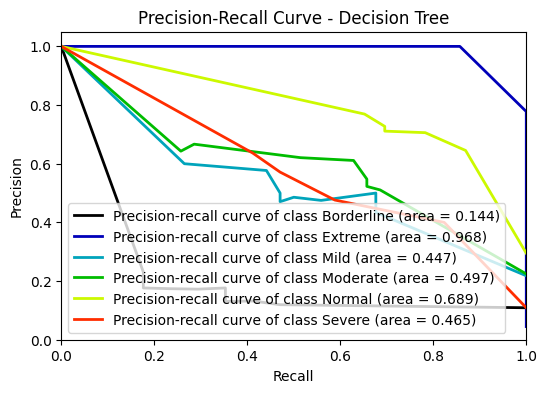

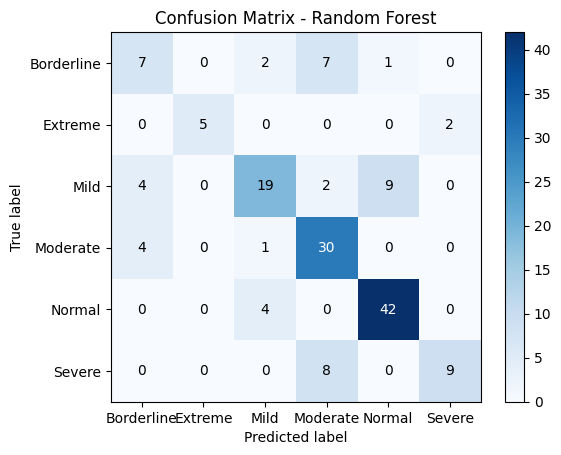

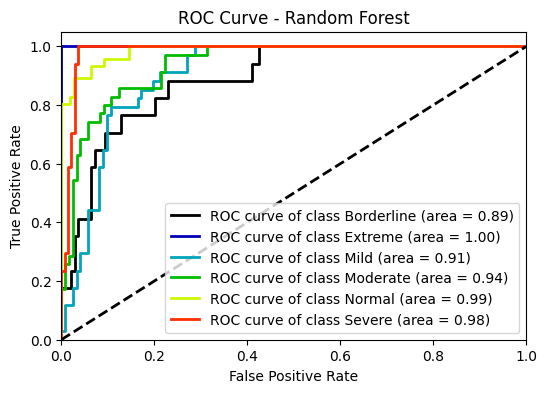

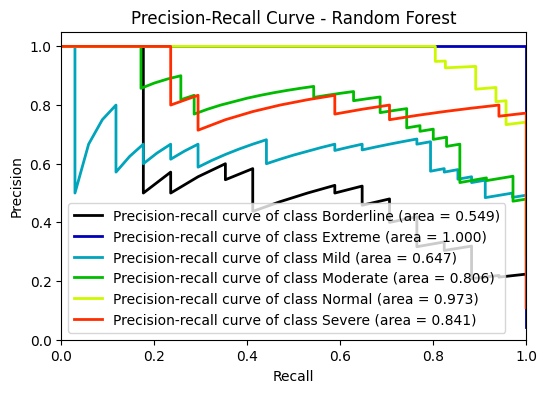

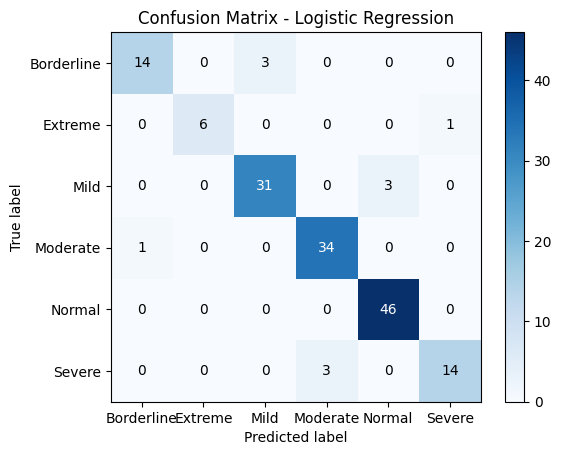

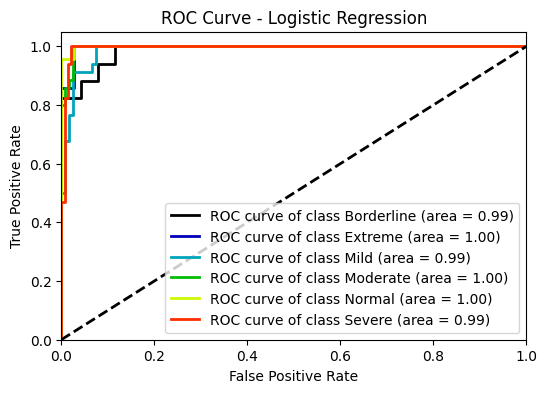

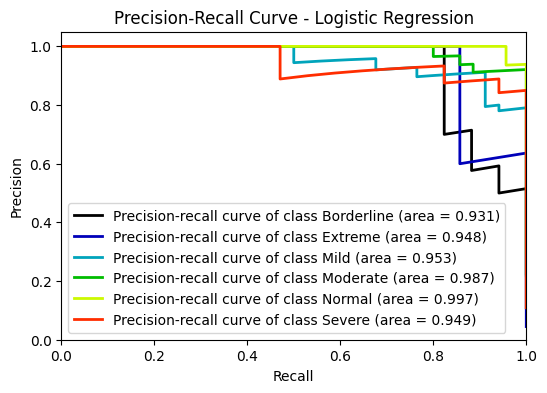

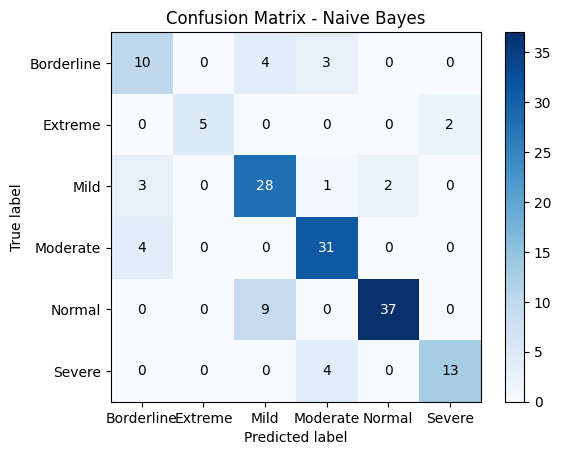

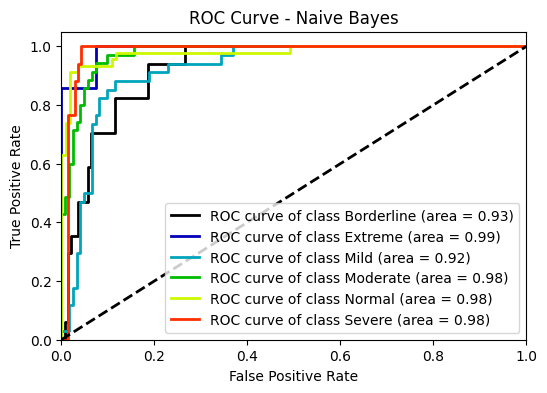

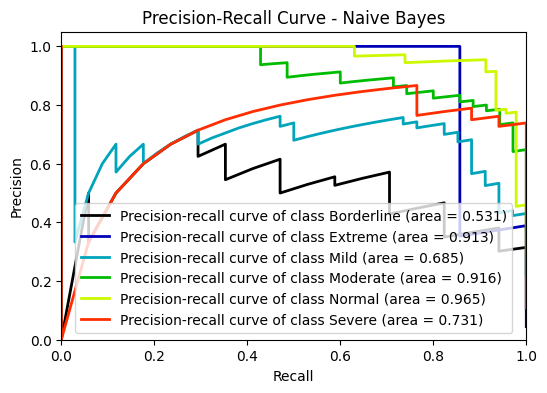

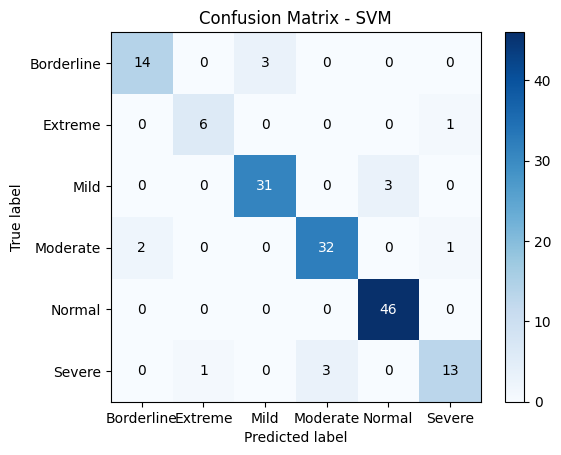

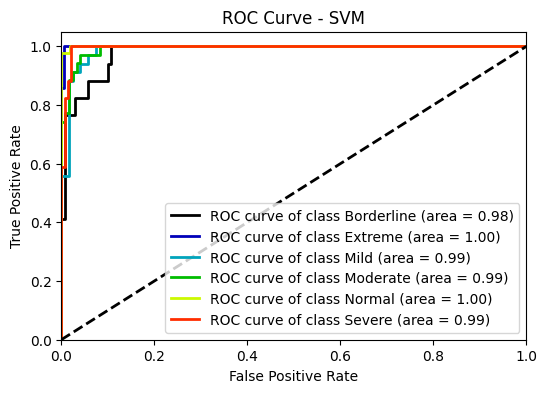

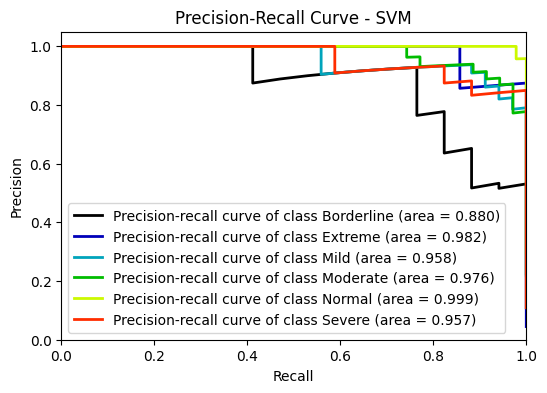

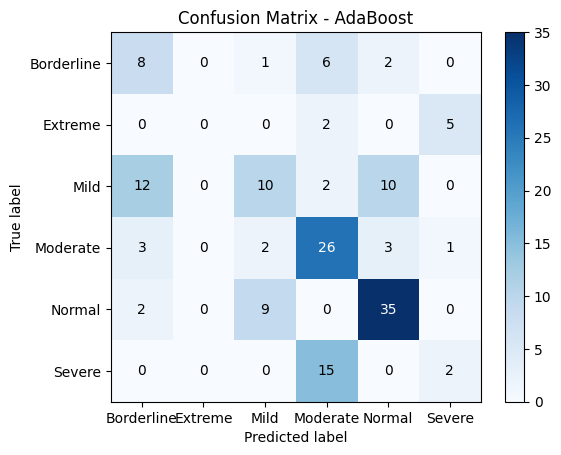

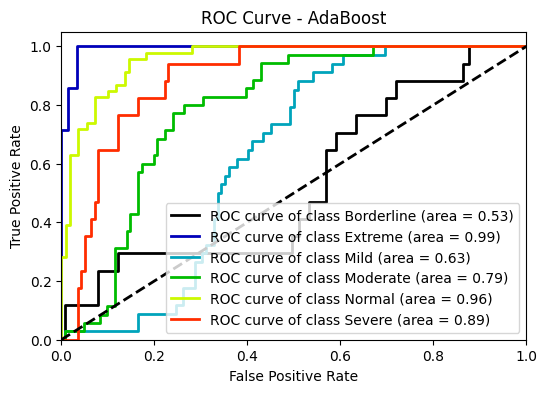

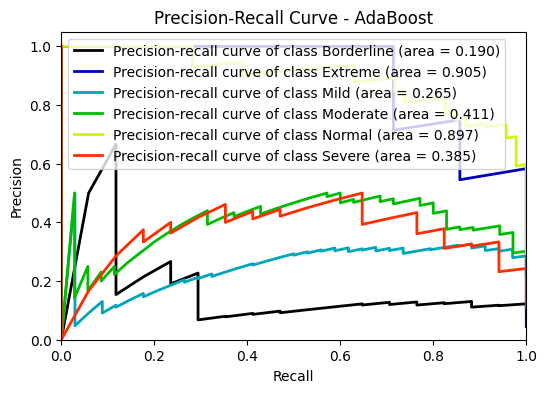

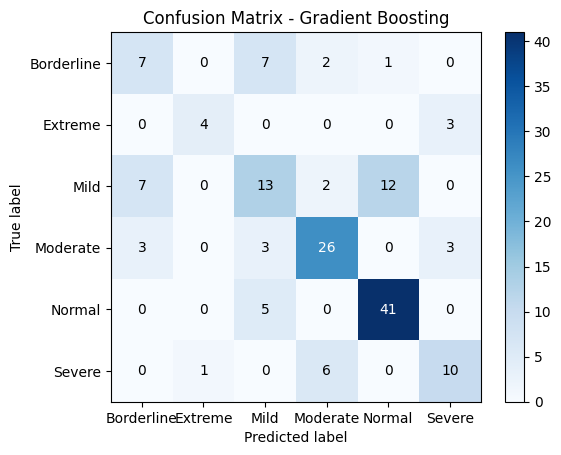

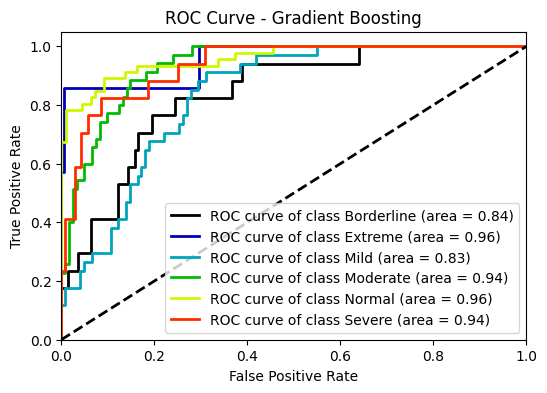

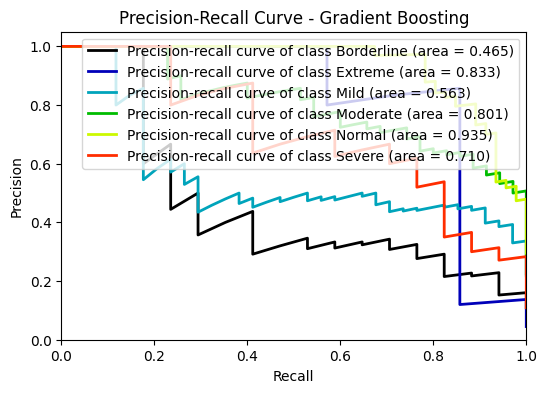

In [ ]:
# Evaluate best classifiers
for name, clf in best_classifiers.items():
    # Train the best classifier
    clf.fit(X_train, y_train)

# Predict using the trained classifier
    y_pred = clf.predict(X_test)

    # Evaluate the classifier's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print evaluation metrics
    print(f"-------------{name}:-------------")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, title=f"Confusion Matrix - {name}");

    # Plot ROC curve with classifier name
    y_probas = clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(6,4), plot_micro=False, plot_macro=False, title=f"ROC Curve - {name}");

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(6,4), plot_micro=False, title=f"Precision-Recall Curve - {name}");

    print()


# Highlights - 

Highest Accuracy -
SVM - 94%
LR - 93%